### %pylab inline
import matplotlib.pyplot as plt
import gala
import gala.potential as gp
import gala.dynamics as gd
import bfe
from scipy.spatial.transform import Rotation as Rot
import nba
import sys
sys.path.append('/home/ngc//Work/research/codes/nba/nba/visuals/')

In [2]:
import plotting

In [3]:
plt.style.use('/home/ngc/Work/research/MW_viz/matplotlib.mplstyle')

In [4]:
def sample_hern(size=1):
    mu = np.random.random(size=size)
    return mu**0.5 / (1-mu**0.5)

def spherical_hern(a, b, c, theta_rot, size=1):
    phi = np.random.uniform(0, 2*np.pi, size=size)
    theta = np.arccos(2*np.random.random(size=size) - 1)
    r = sample_hern(size)
    
    xyz = np.zeros((size, 3))
    xyz[:,0] = r * np.cos(phi) * np.sin(theta) / a
    xyz[:,1] = r * np.sin(phi) * np.sin(theta) / b
    xyz[:,2] = r * np.cos(theta) / c
    
    rot = Rot.from_euler('z', theta_rot, degrees=True)
    rot_xyz = rot.apply(xyz)
    #xa = rot_xyz[0]
    #yb = rot_xyz[1]
    #zc = rot_xyz[2]
    
    return rot_xyz

In [5]:
xyz_hern = spherical_hern(1, 0.5, 0.5, 45, 1000)

(-5.0, 5.0)

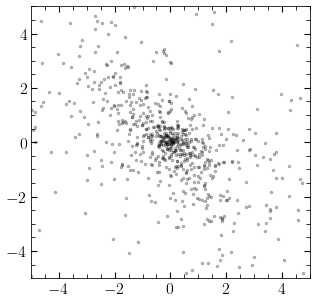

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(xyz_hern[:,0], xyz_hern[:,1], color='k', alpha=0.25, marker='.')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [7]:
def flttened_hernquist_sample(x, y, z, M, a, b, c, rs, theta):
    ## implement rotation
    xyz = np.array([x/a, y/b, z/c])
    rot = Rot.from_euler('x', theta, degrees=True)
    rot_xyz = rot.apply(xyz)
    xa = rot_xyz[0]
    yb = rot_xyz[1]
    zc = rot_xyz[2]
    #s = np.sqrt((x/a)**2 + (y/b)**2 + (z/c)**2)
    s = np.sqrt((xa)**2 + (yb)**2 + (zc)**2)
    return hernquist_density(s, M, rs)

In [8]:
def hernquist_density(r, M, a):
    return M*a / (2*np.pi) / (r*(r+a)**3)

def flattened_hernquist_density(x, y, z, M, a, b, c, rs, theta):
    ## implement rotation
    xyz = np.array([x/a, y/b, z/c])
    rot = Rot.from_euler('x', theta, degrees=True)
    rot_xyz = rot.apply(xyz)
    xa = rot_xyz[0]
    yb = rot_xyz[1]
    zc = rot_xyz[2]
    #s = np.sqrt((x/a)**2 + (y/b)**2 + (z/c)**2)
    s = np.sqrt((xa)**2 + (yb)**2 + (zc)**2)
    return hernquist_density(s, M, rs)

In [9]:
#def built_triaxial_halo(T)

In [10]:
# a>b>c

In [11]:
#s = c/a # minor to major axis
#q = b/a # interm. to major axis#

In [12]:
def compute_triax_halo_coeff(size, a, b, c, theta, nmax=10, lmax=10):
    xyz_hern = spherical_hern(a, b, c, theta, size)
    print('Done generating halo')
    Snlm_hern, Tnlm_hern = gp.scf.compute_coeffs_discrete(xyz_hern, 
                                                          mass=np.ones(len(xyz_hern))/len(xyz_hern), 
                                                          nmax=nmax, lmax=lmax, r_s=1)
    print('Done computing coefficients')
    halo_coefs = bfe.coefficients.Coeff_properties(Snlm_hern, Tnlm_hern, nmax=nmax+1, lmax=lmax+1)
    U = halo_coefs.U_all()
    return -U, [Snlm_hern, Tnlm_hern]

In [13]:
def make_shape_coeff_plot(pot, U , title):
    grid = np.linspace(-6, 6, 128)

    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    _ = pot.plot_contours((grid, grid, 0), ax=axes[0])
    axes[0].set_xlabel('$x$')
    axes[0].set_ylabel('$y$')

    _ = pot.plot_contours((grid, 0, grid), ax=axes[1])
    axes[1].set_xlabel('$x$')
    axes[1].set_ylabel('$z$')

    im = axes[2].imshow(np.log10(np.sum(U[:,:,:], axis=0)).T, origin='lower', vmin=-0.5, vmax=-4, cmap='Blues')
    fig = plt.colorbar(im, ax=axes[2])
    axes[2].set_xlabel('$l$')
    axes[2].set_ylabel('$m$')
    plt.suptitle(title, fontsize=17)
    
    return fig


Done generating halo
Done computing coefficients


/tmp/ipykernel_27999/4291696361.py:13: RuntimeWarning: divide by zero encountered in log10
  im = axes[2].imshow(np.log10(np.sum(U[:,:,:], axis=0)).T, origin='lower', vmin=-0.5, vmax=-4, cmap='Blues')


Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients


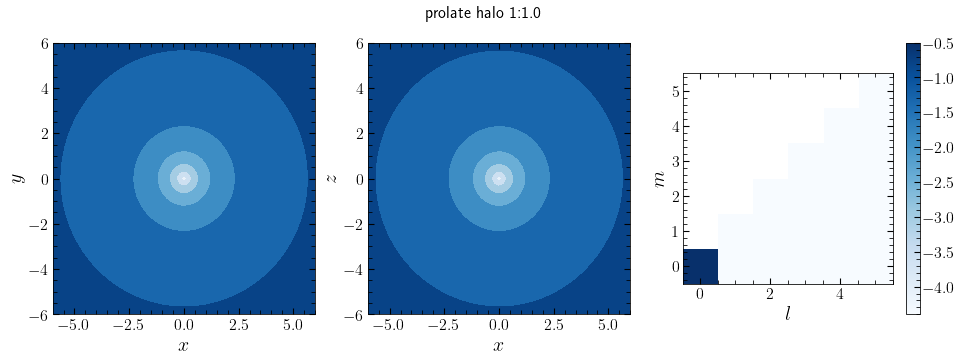

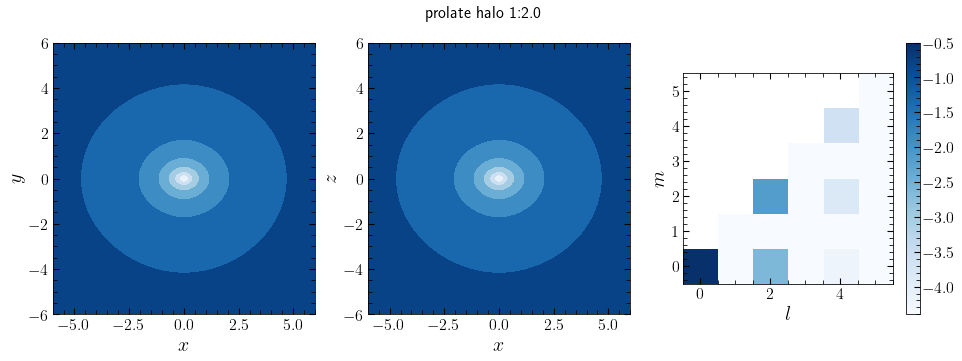

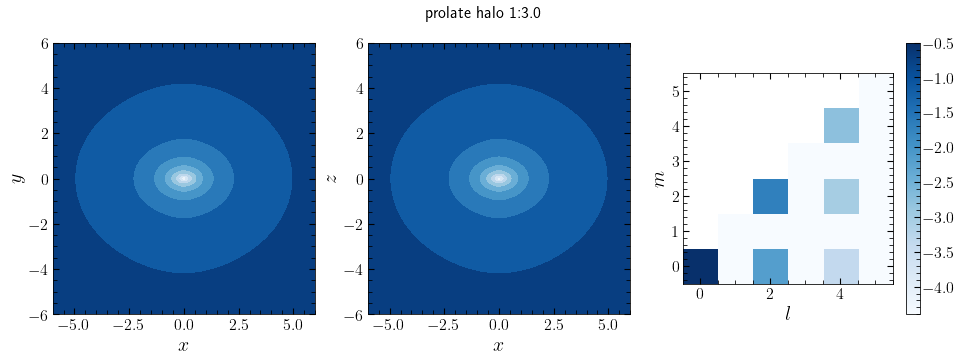

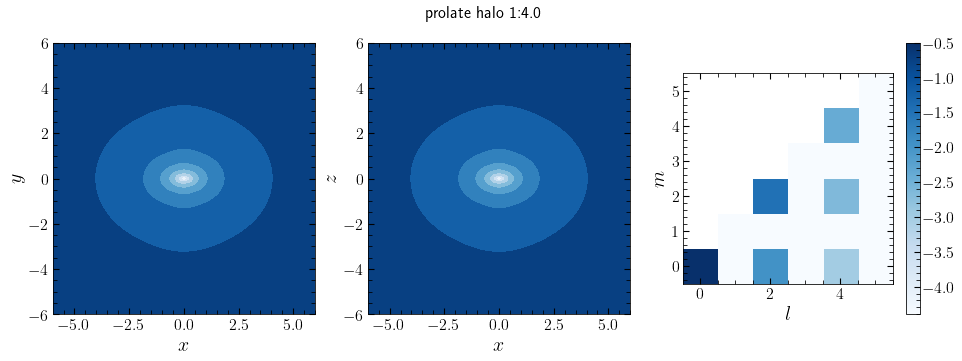

In [14]:
npart = 100000
a = 1
b = 2
c = 2
theta=0
ar = np.linspace(1, 4, 4)
for q in range(len(ar)):
    U_prol, coeff_halo = compute_triax_halo_coeff(npart, a, ar[q], ar[q], theta, nmax=10, lmax=5)
    halo_pot = gp.scf.SCFPotential(1, 1, coeff_halo[0], coeff_halo[1])
    make_shape_coeff_plot(halo_pot, U_prol, r'prolate halo 1:{}'.format(ar[q]))

Done generating halo
Done computing coefficients


/tmp/ipykernel_27999/4291696361.py:13: RuntimeWarning: divide by zero encountered in log10
  im = axes[2].imshow(np.log10(np.sum(U[:,:,:], axis=0)).T, origin='lower', vmin=-0.5, vmax=-4, cmap='Blues')


Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients


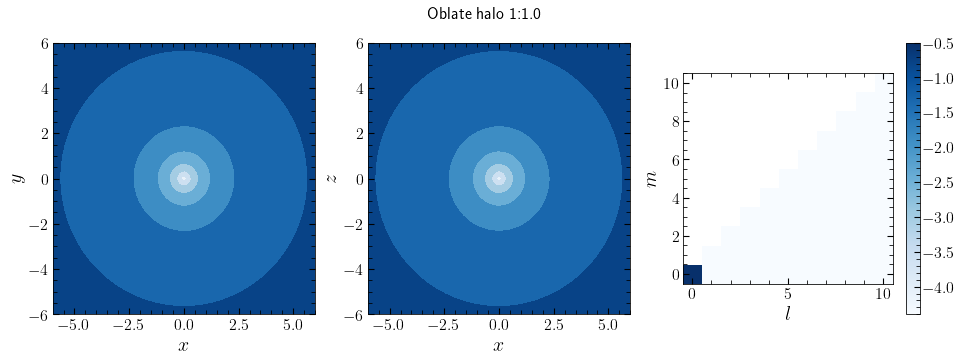

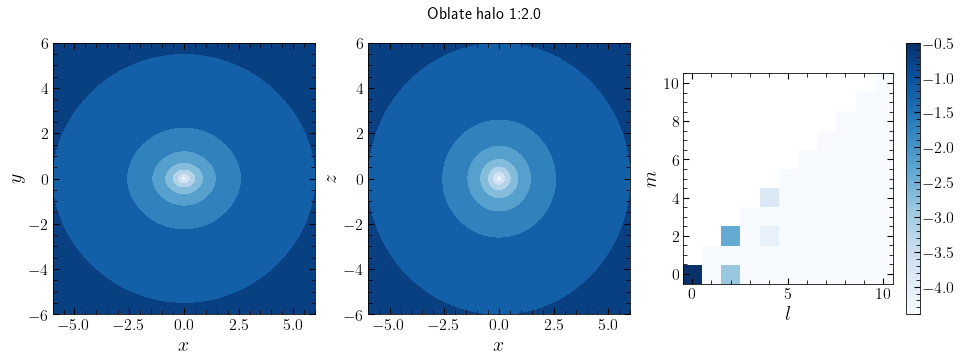

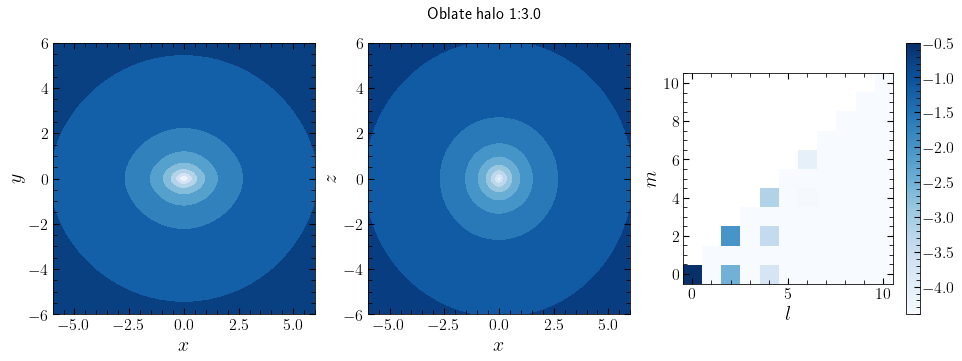

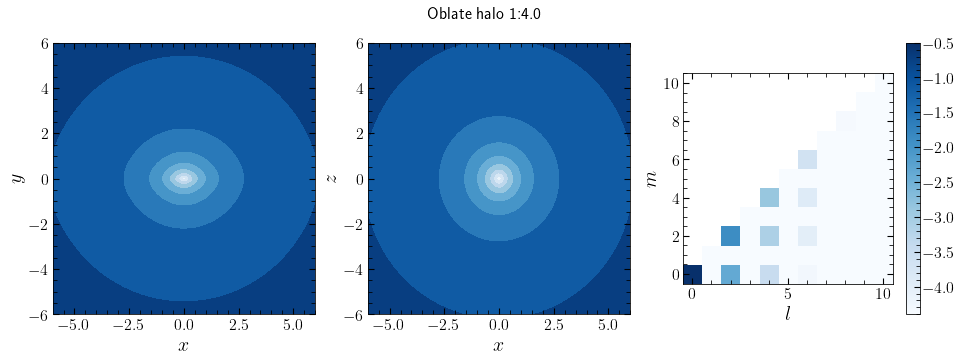

In [15]:
npart = 100000
a = 1
b = 1
c = 2
theta=0
ar = np.linspace(1, 4, 4)
for q in range(len(ar)):
    U_obl, coeff_halo = compute_triax_halo_coeff(npart, a, ar[q], b, theta=0, nmax=10, lmax=10)
    halo_pot = gp.scf.SCFPotential(1, 1, coeff_halo[0], coeff_halo[1])
    make_shape_coeff_plot(halo_pot, U_obl, r'Oblate halo 1:{}'.format(ar[q]))

In [1]:
import gala

In [4]:
import numpy as np

In [5]:
np.savetxt?

Done generating halo
Done computing coefficients


/tmp/ipykernel_27999/4291696361.py:13: RuntimeWarning: divide by zero encountered in log10
  im = axes[2].imshow(np.log10(np.sum(U[:,:,:], axis=0)).T, origin='lower', vmin=-0.5, vmax=-4, cmap='Blues')


Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients


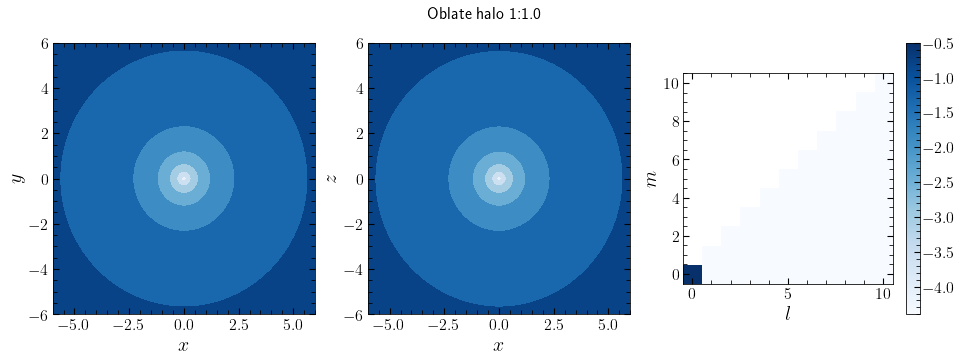

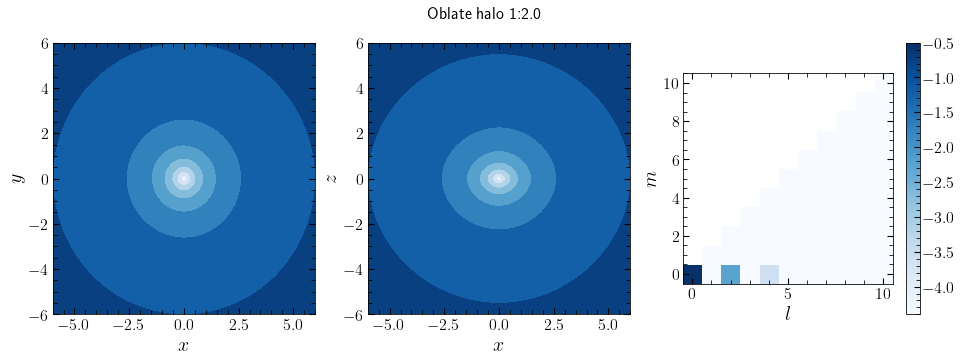

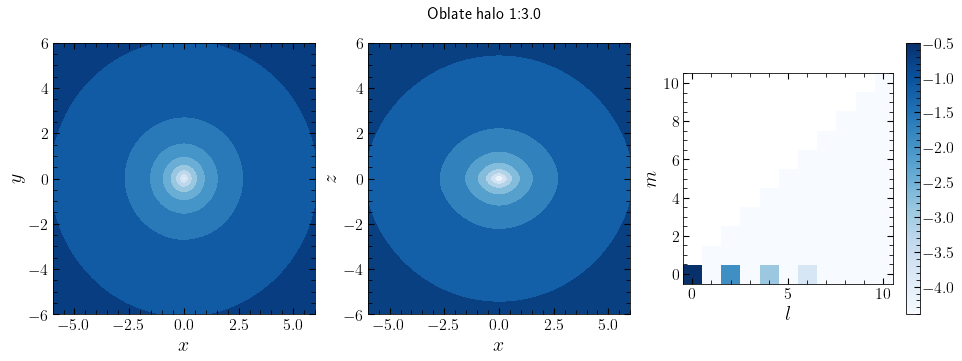

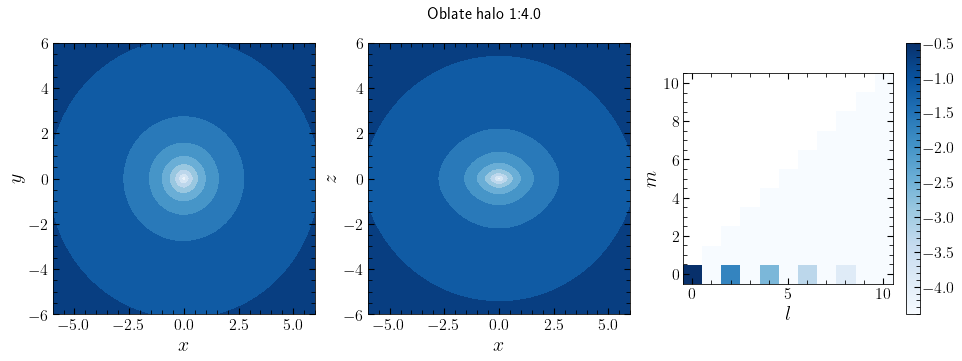

In [16]:
npart = 100000
a = 1
b = 1
c = 2
theta=0
ar = np.linspace(1, 4, 4)
for q in range(len(ar)):
    U_obl, coeff_halo = compute_triax_halo_coeff(npart, a, b, ar[q], theta=0, nmax=10, lmax=10)
    halo_pot = gp.scf.SCFPotential(1, 1, coeff_halo[0], coeff_halo[1])
    make_shape_coeff_plot(halo_pot, U_obl, r'Oblate halo 1:{}'.format(ar[q]))

Done generating halo
Done computing coefficients


/tmp/ipykernel_27999/4291696361.py:13: RuntimeWarning: divide by zero encountered in log10
  im = axes[2].imshow(np.log10(np.sum(U[:,:,:], axis=0)).T, origin='lower', vmin=-0.5, vmax=-4, cmap='Blues')


Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients


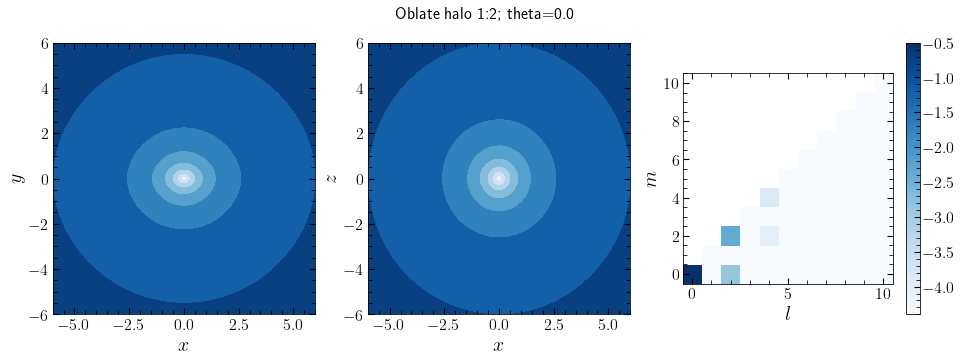

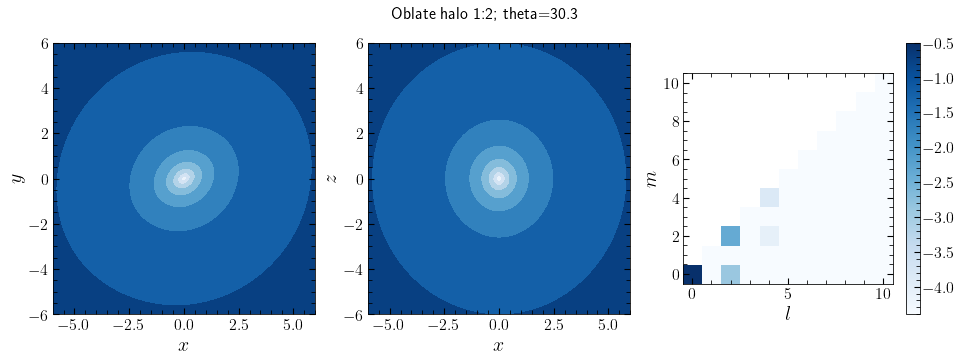

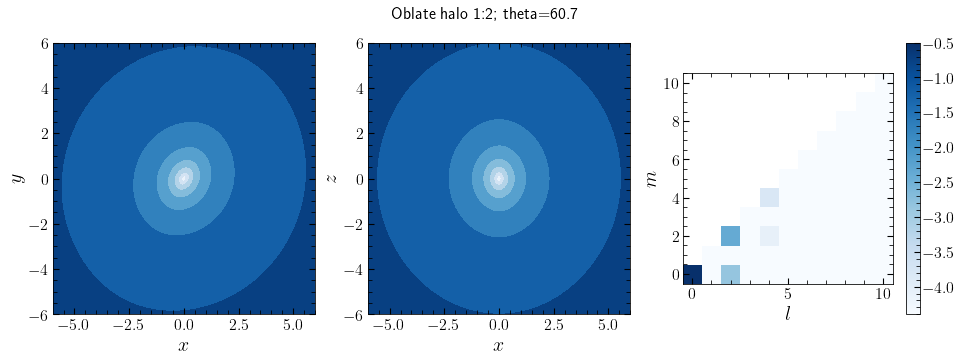

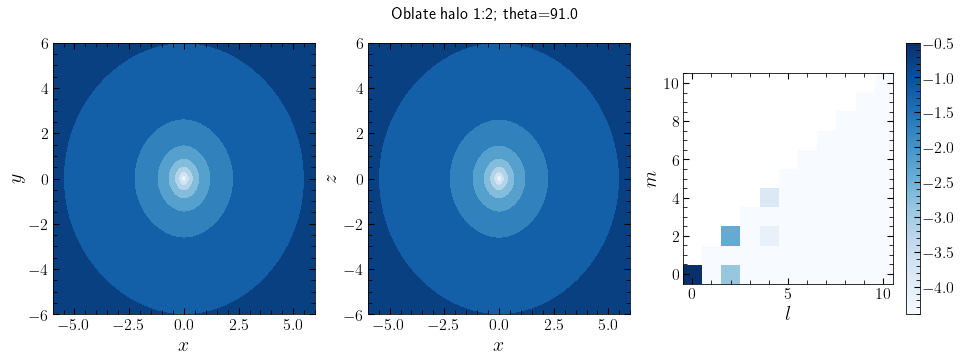

In [17]:
npart = 100000
a = 1
b = 1
c = 2
theta= np.linspace(0, 91, 4)
for t in range(len(theta)):
    U_obl, coeff_halo = compute_triax_halo_coeff(npart, a, 2, b, theta=theta[t], nmax=10, lmax=10)
    halo_pot = gp.scf.SCFPotential(1, 1, coeff_halo[0], coeff_halo[1])
    make_shape_coeff_plot(halo_pot, U_obl, r'Oblate halo 1:2; theta={:.1f}'.format(theta[t]))

Done generating halo
Done computing coefficients


/tmp/ipykernel_27999/4291696361.py:13: RuntimeWarning: divide by zero encountered in log10
  im = axes[2].imshow(np.log10(np.sum(U[:,:,:], axis=0)).T, origin='lower', vmin=-0.5, vmax=-4, cmap='Blues')


Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients


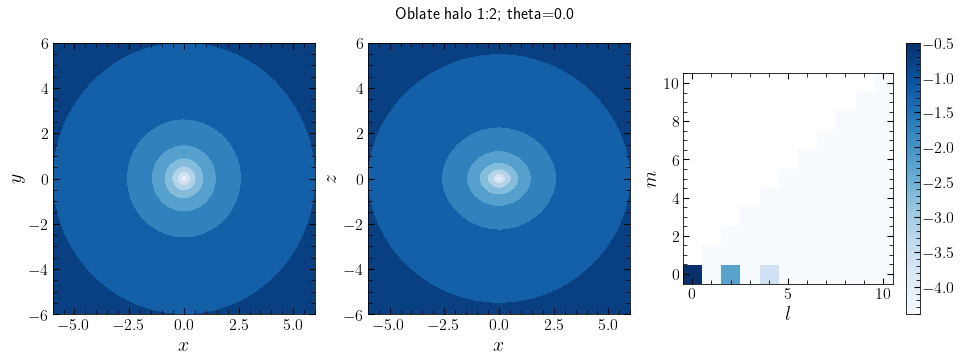

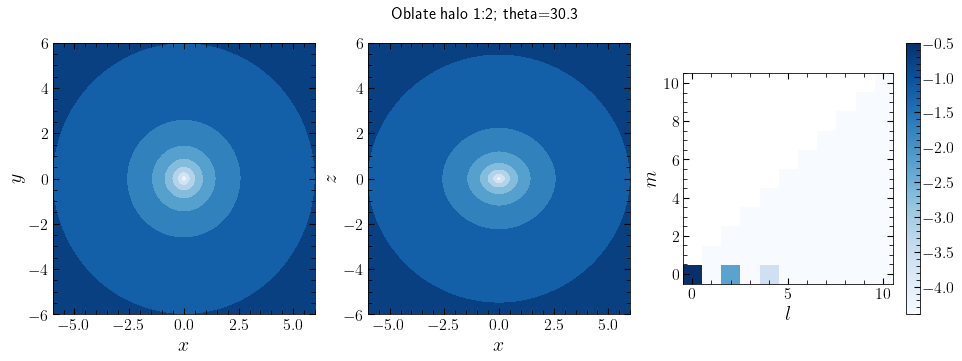

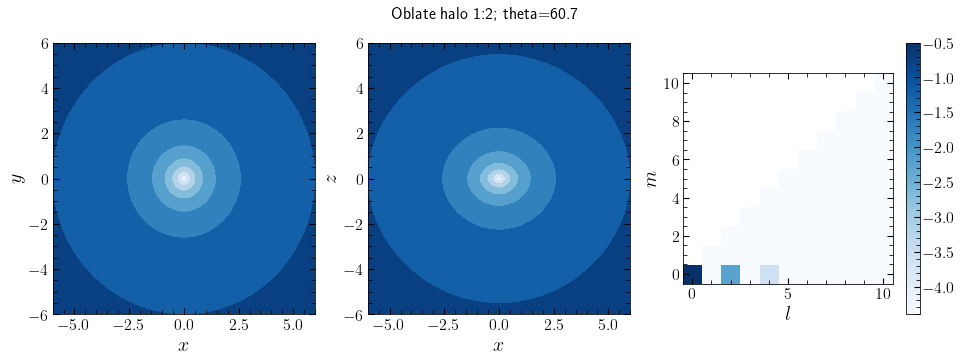

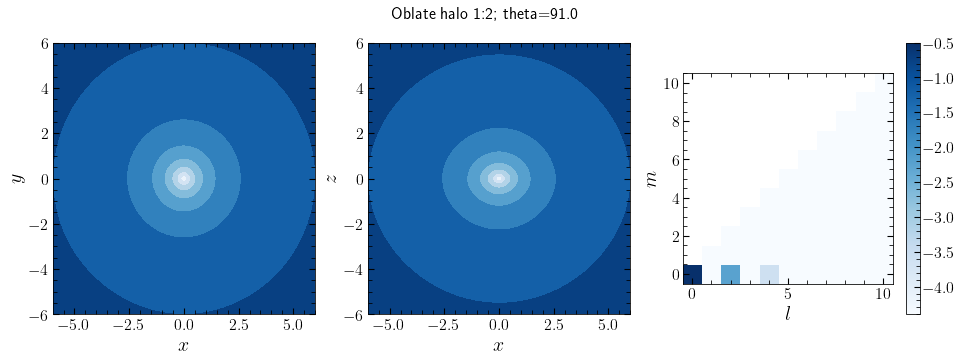

In [18]:
npart = 100000
a = 1
b = 1
c = 2
theta= np.linspace(0, 91, 4)
for t in range(len(theta)):
    U_obl, coeff_halo = compute_triax_halo_coeff(npart, a, b, 2, theta=theta[t], nmax=10, lmax=10)
    halo_pot = gp.scf.SCFPotential(1, 1, coeff_halo[0], coeff_halo[1])
    make_shape_coeff_plot(halo_pot, U_obl, r'Oblate halo 1:2; theta={:.1f}'.format(theta[t]))

In [19]:
# Non axi-simmetry

In [20]:
def spherical_shell(R, size=1):
    phi = np.random.uniform(0, 2*np.pi, size=size)
    theta = np.arccos(2*np.random.random(size=size) - 1)
    xyz = np.zeros((size, 3))
    xyz[:,0] = R * np.cos(phi) * np.sin(theta) 
    xyz[:,1] = R * np.sin(phi) * np.sin(theta) 
    xyz[:,2] = R * np.cos(theta) 
    return xyz

In [21]:
from bfe.coefficients import fields

In [22]:
npart = 1000000


In [23]:
c = np.linspace(0.5, 2, 4)
print(c)

[0.5 1.  1.5 2. ]


In [24]:
nmax = 10
lmax = 5

U_t, coeff_halo = compute_triax_halo_coeff(npart, 2, 0.5, 0.5, theta=0, nmax=nmax, lmax=lmax) 
halo_pot = gp.scf.SCFPotential(1, 1, coeff_halo[0], coeff_halo[1])

Done generating halo
Done computing coefficients


/tmp/ipykernel_27999/4291696361.py:13: RuntimeWarning: divide by zero encountered in log10
  im = axes[2].imshow(np.log10(np.sum(U[:,:,:], axis=0)).T, origin='lower', vmin=-0.5, vmax=-4, cmap='Blues')


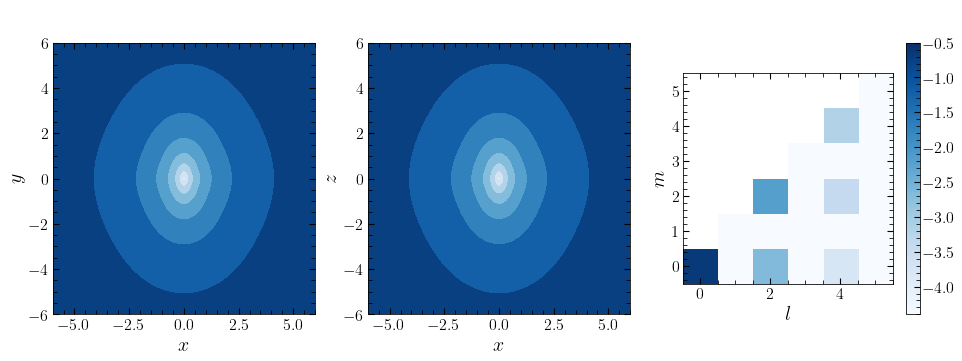

In [25]:
make_shape_coeff_plot(halo_pot, U_t,  title=' ')

In [26]:
ngrid = 100000
pos_R50 = spherical_shell(1, size=ngrid)
halo_kin = nba.kinematics.Kinematics(pos_R50, pos_R50)
lhalo, bhalo = halo_kin.pos_cartesian_to_galactic()
rho_halo = halo_pot.density(pos_R50.T)

In [27]:
print(np.min(rho_halo), np.max(rho_halo)) 

-0.0018604008979216584 0.03518795784917632


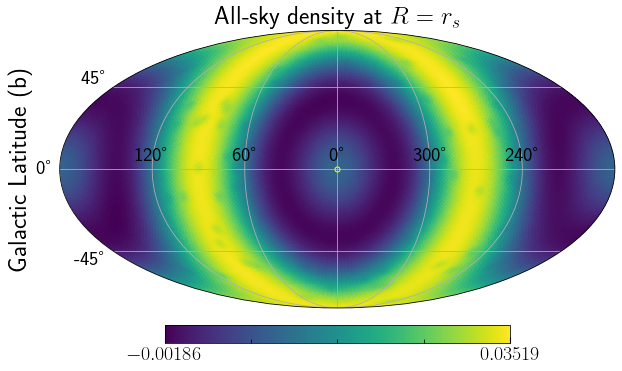

In [28]:
plotting.mollweide_projection(l=lhalo*180/np.pi, b=bhalo*180/np.pi, l2=0, b2=0, q=rho_halo, title='All-sky density at $R=r_s$',
                              bmin=np.min(rho_halo), bmax=np.max(rho_halo), nside=40, smooth=5, cmap='viridis')

In [29]:
test_f = fields.BFEpot(pos_R50, coeff_halo[0], coeff_halo[1], nmax=nmax+1, lmax=lmax+1, rs=1, G=1, M=1)
#pot_nlm = np.zeros((nmax+1, lmax+1, lmax+1))
#dens_nlm = np.zeros((nmax+1, lmax+1, lmax+1))
rho_mon = np.zeros(ngrid)
for n in range(nmax+1):
    rho_mon += test_f.density_nlm(n, 0, 0)

In [30]:
print(np.min(rho_mon), np.max(rho_mon))

0.01476023196697577 0.014760231966975785


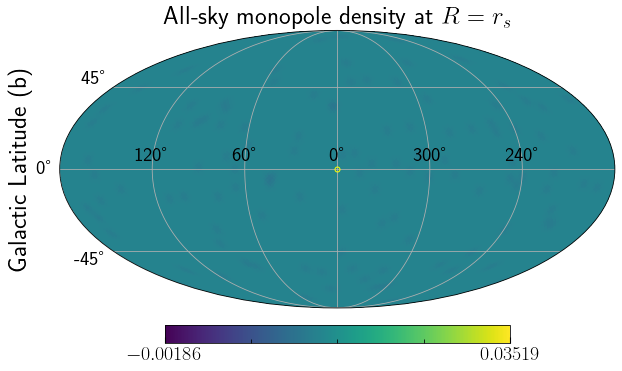

In [31]:
plotting.mollweide_projection(l=lhalo*180/np.pi, b=bhalo*180/np.pi, l2=0, b2=0, q=rho_mon, title='All-sky monopole density at $R=r_s$',
                              bmin=np.min(rho_halo), bmax=np.max(rho_halo), nside=40, smooth=5, cmap='viridis')

In [32]:
rho_4 = np.zeros(ngrid)
for n in range(nmax+1):
    for m in range(4+1):
        rho_4 += test_f.density_nlm(n, 4, m)


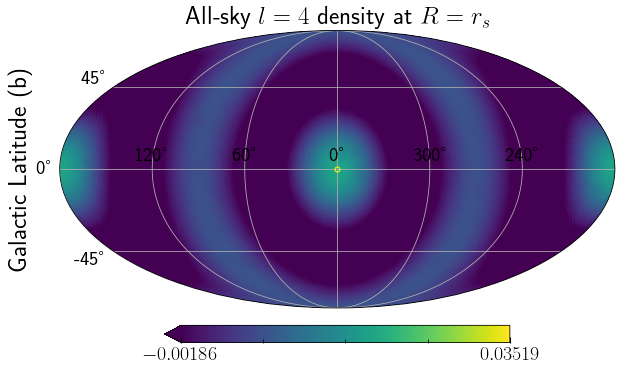

In [33]:
plotting.mollweide_projection(l=lhalo*180/np.pi, b=bhalo*180/np.pi, l2=0, b2=0, q=rho_4, title='All-sky $l=4$ density at $R=r_s$',
                              bmin=np.min(rho_halo), bmax=np.max(rho_halo), nside=40, smooth=5, cmap='viridis')

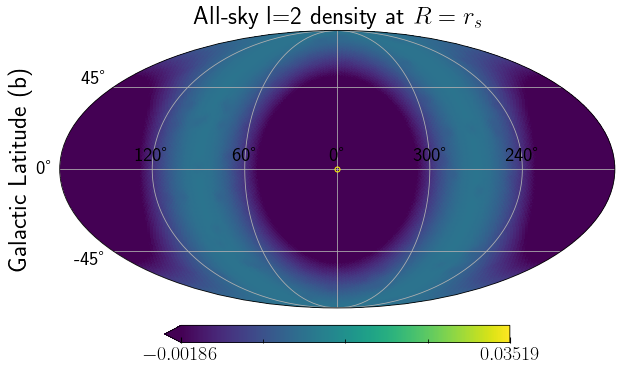

In [34]:
rho_quad = np.zeros(ngrid)
for n in range(nmax+1):
    for m in range(3):
        rho_quad += test_f.density_nlm(n, 2, m)

plotting.mollweide_projection(l=lhalo*180/np.pi, b=bhalo*180/np.pi, l2=0, b2=0, q=rho_quad, title='All-sky l=2 density at $R=r_s$',
                              bmin=np.min(rho_halo), bmax=np.max(rho_halo), nside=40, smooth=5, cmap='viridis')

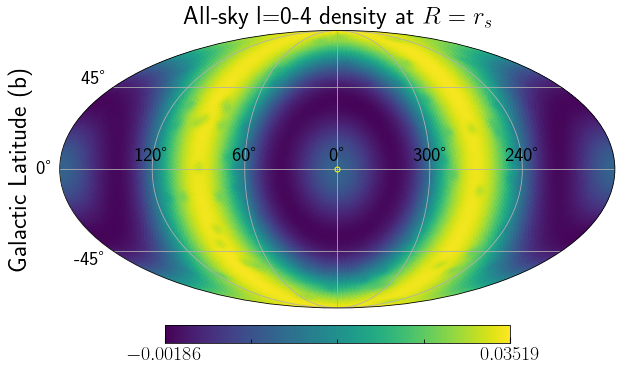

In [35]:
plotting.mollweide_projection(l=lhalo*180/np.pi, b=bhalo*180/np.pi, l2=0, b2=0, q=rho_4+rho_quad+rho_mon,
                              title='All-sky l=0-4 density at $R=r_s$',
                              bmin=np.min(rho_halo), bmax=np.max(rho_halo), nside=40, smooth=5, cmap='viridis')

In [81]:
def get_fields_radial_contribution(coeff, rbins, nmax, lmax, ngrid):
    """
    Function that compute the contribution of the l-order term to the density and potential
    
    
    
    """
    rho_lr = np.zeros((len(rbins), lmax+1))
    pot_lr = np.zeros((len(rbins), lmax+1))

    rho_shell = np.zeros(len(rbins))
    pot_shell = np.zeros(len(rbins))

    for r in range(len(rbins)):
        print(rbins[r])
        pos_rshell = spherical_shell(rbins[r], size=ngrid)
        rho_shell[r] = np.sum(np.abs(halo_pot.density(pos_rshell.T)))
        pot_shell[r] = np.sum(np.abs(halo_pot.energy(pos_rshell.T)))

        test_f = fields.BFEpot(pos_rshell, coeff[0], coeff[1], nmax=nmax+1, lmax=lmax+1, rs=1, G=1, M=1)
        pot_nlm = np.zeros((nmax+1, lmax+1, lmax+1))
        dens_nlm = np.zeros((nmax+1, lmax+1, lmax+1))

        for n in range(nmax+1):
            for l in range(lmax+1):
                for m in range(l+1):
                    pot_nlm[n,l,m] = np.sum(np.abs(test_f.potential_nlm(n,l,m)))
                    dens_nlm[n,l,m] = np.sum(np.abs(test_f.density_nlm(n,l,m)))
        rho_lr[r] = np.sum(np.abs(np.sum((dens_nlm[:,:,:]), axis=2)), axis=0)
        pot_lr[r] = np.sum(np.abs(np.sum((pot_nlm[:,:,:]), axis=2)), axis=0)
    return rho_lr, pot_lr, rho_shell, pot_shell

In [69]:
nmax = 10
lmax = 5

U_prolate_1_4, coeff_prolate_1_4 = compute_triax_halo_coeff(npart, 2, 0.5, 0.5, theta=0, nmax=nmax, lmax=lmax) 
U_prolate_1_3, coeff_prolate_1_3 = compute_triax_halo_coeff(npart, 2, 0.7, 0.7, theta=0, nmax=nmax, lmax=lmax) 
U_prolate_1_2, coeff_prolate_1_2 = compute_triax_halo_coeff(npart, 2, 1.0, 1.0, theta=0, nmax=nmax, lmax=lmax) 


Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients
Done generating halo
Done computing coefficients


In [ ]:
rbins = np.arange(0.5, 2.6, 0.5)
ngrid = 100000


In [82]:
rho_lr_prolate_1_4, pot_lr_prolate_1_4, rho_shell_prol_1_4, pot_shell_prol_1_4 = get_fields_radial_contribution(coeff_prolate_1_4, 
                                                                      rbins, nmax, lmax, ngrid)

0.5
1.0
1.5
2.0
2.5


In [83]:
rho_lr_prolate_1_3, pot_lr_prolate_1_3, rho_shell_prol_1_3, pot_shell_prol_1_3 = get_fields_radial_contribution(coeff_prolate_1_3, 
                                                                      rbins, nmax, lmax, ngrid)

0.5
1.0
1.5
2.0
2.5


In [84]:
rho_lr_prolate_1_2, pot_lr_prolate_1_2, rho_shell_prol_1_2, pot_shell_prol_1_2 = get_fields_radial_contribution(coeff_prolate_1_2, 
                                                                      rbins, nmax, lmax, ngrid)

0.5
1.0
1.5
2.0
2.5


In [ ]:
## dipole direction as a function of radius

In [88]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

Text(0.5, 1.0, '$\\rm{Prolate\\ Halos}$')

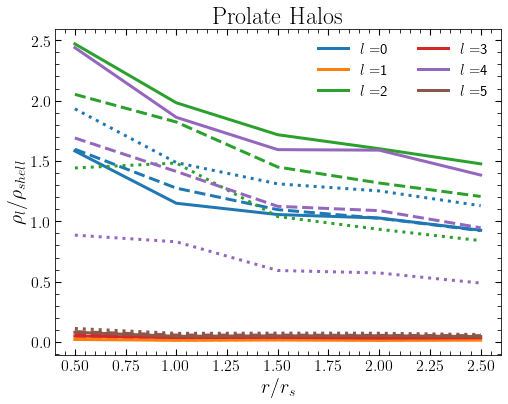

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for l in range(lmax+1):
    plt.plot(rbins, rho_lr_prolate_1_4[:,l]/rho_shell_prol_1_4, label='$l=${}'.format(l), c=colors[l])
    plt.plot(rbins, rho_lr_prolate_1_3[:,l]/rho_shell_prol_1_3, ls='--', c=colors[l])
    plt.plot(rbins, rho_lr_prolate_1_2[:,l]/rho_shell_prol_1_2, ls=':', c=colors[l])

plt.legend(ncol=2, fontsize=15, frameon=False)
plt.xlabel(r'$r/r_s$')
plt.ylabel(r'$\rho_{l}/\rho_{shell}$')
plt.title(r'$\rm{Prolate\ Halos}$')

Text(0.5, 1.0, '$\\rm{Prolate\\ Halos}$')

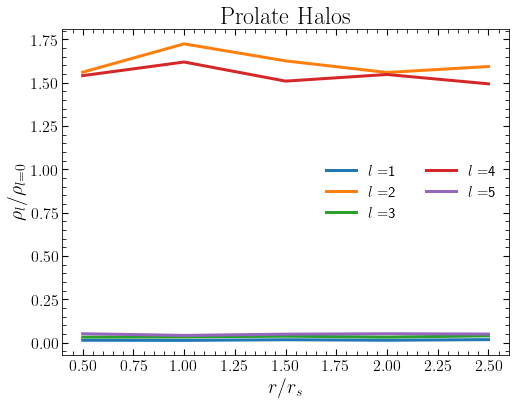

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for l in range(1, lmax+1):
    plt.plot(rbins, rho_lr_prolate_1_4[:,l]/rho_lr_prolate_1_4[:,0], label='$l=${}'.format(l), c=colors[l-1])
    #plt.plot(rbins, rho_lr_prolate_1_3[:,l]/rho_shell_prol_1_3, ls='--', c=colors[l-1])
    #plt.plot(rbins, rho_lr_prolate_1_2[:,l]/rho_shell_prol_1_2, ls=':', c=colors[l-1])

plt.legend(ncol=2, fontsize=15, frameon=False)
plt.xlabel(r'$r/r_s$')
plt.ylabel(r'$\rho_{l}/\rho_{l=0}$')
plt.title(r'$\rm{Prolate\ Halos}$')

In [96]:
plt.legend?

Text(0.5, 1.0, '$\\rm{Prolate\\ Halo}$')

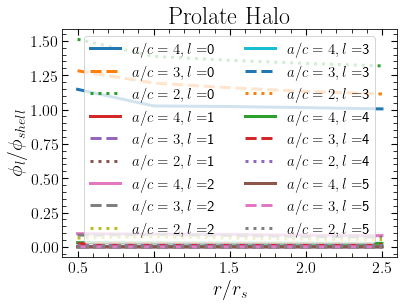

In [90]:
for l in range(lmax+1):
    plt.plot(rbins, pot_lr_prolate_1_4[:,l]/pot_shell_prol_1_4, label='$a/c=4, l=${}'.format(l))
    plt.plot(rbins, pot_lr_prolate_1_3[:,l]/pot_shell_prol_1_3, label='$a/c=3, l=${}'.format(l), ls='--')
    plt.plot(rbins, pot_lr_prolate_1_2[:,l]/pot_shell_prol_1_2, label='$a/c=2, l=${}'.format(l), ls=':')

plt.legend(ncol=2, fontsize=15)
plt.xlabel(r'$r/r_s$')
plt.ylabel(r'$\phi_{l}/\phi_{shell}$')
plt.title(r'$\rm{Prolate\ Halo}$')

In [36]:
rbins = np.arange(0.5, 2.6, 0.5)
rho_lr = np.zeros((len(rbins), lmax+1))
pot_lr = np.zeros((len(rbins), lmax+1))

rho_shell = np.zeros(len(rbins))
pot_shell = np.zeros(len(rbins))

for r in range(len(rbins)):
    print(rbins[r])
    pos_R5 = spherical_shell(rbins[r], size=ngrid)
    rho_shell[r] = np.sum(np.abs(halo_pot.density(pos_R5.T)))
    pot_shell[r] = np.sum(np.abs(halo_pot.energy(pos_R5.T)))

    test_f = fields.BFEpot(pos_R5, coeff_halo[0], coeff_halo[1], nmax=nmax+1, lmax=lmax+1, rs=1, G=1, M=1)
    pot_nlm = np.zeros((11, 6, 6))
    dens_nlm = np.zeros((11, 6, 6))

    for n in range(nmax+1):
        for l in range(lmax+1):
            for m in range(l+1):
                pot_nlm[n,l,m] = np.sum(np.abs(test_f.potential_nlm(n,l,m)))
                dens_nlm[n,l,m] = np.sum(np.abs(test_f.density_nlm(n,l,m)))
    rho_lr[r] = np.sum(np.abs(np.sum((dens_nlm[:,:,:]), axis=2)), axis=0)
    pot_lr[r] = np.sum(np.abs(np.sum((pot_nlm[:,:,:]), axis=2)), axis=0)

0.5
1.0
1.5
2.0
2.5


Text(0.5, 1.0, '$\\rm{Prolate\\ Halo}$')

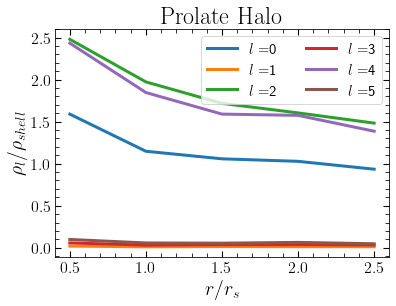

In [65]:
for l in range(lmax+1):
    plt.plot(rbins, rho_lr[:,l]/rho_shell, label='$l=${}'.format(l))
plt.legend(ncol=2, fontsize=15)
plt.xlabel(r'$r/r_s$')
plt.ylabel(r'$\rho_{l}/\rho_{shell}$')
plt.title(r'$\rm{Prolate\ Halo}$')

In [ ]:
# Above plot as a function of b/a ..

In [66]:
## Dipole Direction! 

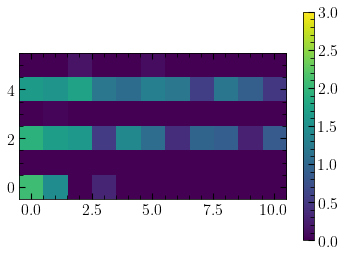

In [37]:
plt.imshow(np.log10(np.abs(np.sum(dens_nlm[:,:,:], axis=2)).T), origin='lower', vmax=3, vmin=0)
plt.colorbar()

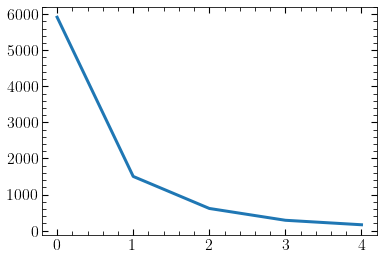

In [38]:
plt.plot(rho_shell)

In [39]:
rho_lr[0]/rho_shell[0]

array([1.58928734, 0.01976558, 2.47941324, 0.05736465, 2.43347844,
       0.09859006])

Text(0.5, 1.0, 'Density')

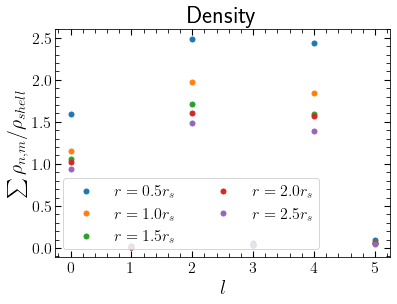

In [40]:
for r in range(0, len(rbins)):
    plt.scatter(np.arange(0, lmax+1, 1), rho_lr[r]/rho_shell[r], label='$r={} r_s$'.format(rbins[r]))
plt.legend(ncol=2, fontsize=16, loc='lower left')
plt.xlabel('$l$')
plt.ylabel(r'$\sum \rho_{n,m} / \rho_{shell}$')
plt.title('Density')

Text(0.5, 1.0, 'Potential')

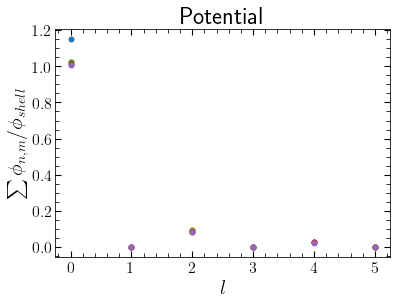

In [41]:
for r in range(0, len(rbins)):
    plt.scatter(np.arange(0, lmax+1, 1), pot_lr[r]/pot_shell[r], label='$r={} r_s$'.format(rbins[r]))
#plt.legend(ncol=2, fontsize=16, loc='lower left')
plt.xlabel('$l$')
plt.ylabel(r'$\sum \phi_{n,m} / \phi_{shell}$')
plt.title('Potential')

# plotting.mollweide_projection(90, 180, quantity = rho_halo)

In [71]:
c = np.linspace(0.5, 2, 4)
nmax = 10
lmax = 5
for q in range(len(c)):
    U_t, coeff_t = compute_triax_halo_coeff(npart, 2, 2, q, theta=0, nmax=nmax, lmax=lmax)
    test_f = fields.BFEpot(pos_R50, coeff_t[0], coeff_t[1], nmax=nmax+1, lmax=lmax+1, rs=1, G=1, M=1)
    pot_nlm = np.zeros((nmax+1, lmax+1, lmax+1))
    dens_nlm = np.zeros((nmax+1, lmax+1, lmax+1))

    for n in range(nmax+1):
        for l in range(lmax+1):
            for m in range(l+1):
                pot_nlm[n,l,m] = test_f.potential_nlm(n,l,m).sum()
                dens_nlm[n,l,m] = test_f.density_nlm(n,l,m).sum()

In [72]:
pot_nlm = np.zeros((11, 6, 6))
dens_nlm = np.zeros((11, 6, 6))

for n in range(11):
    for l in range(6):
        for m in range(l+1):
            pot_nlm[n,l,m] = test_f.potential_nlm(n,l,m).sum()
            dens_nlm[n,l,m] = test_f.density_nlm(n,l,m).sum()


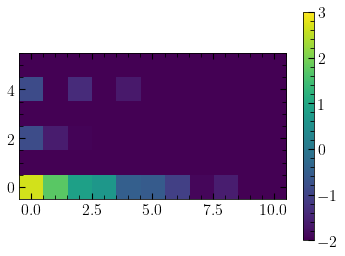

In [73]:
plt.imshow(np.log10(np.abs(np.sum(pot_nlm[:,:,:], axis=2)).T), origin='lower', vmax=3, vmin=-2)
plt.colorbar()

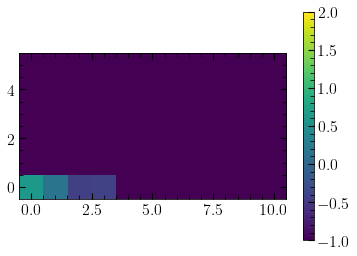

In [74]:
plt.imshow(np.log10(np.abs(np.sum(dens_nlm[:,:,:], axis=2)).T), origin='lower', vmax=2, vmin=-1)
plt.colorbar()

In [75]:
dens_nm = np.sum(np.sum(dens_nlm[:,:,:], axis=2),axis=0)
pot_nm = np.sum(np.sum(pot_nlm[:,:,:], axis=2),axis=0)

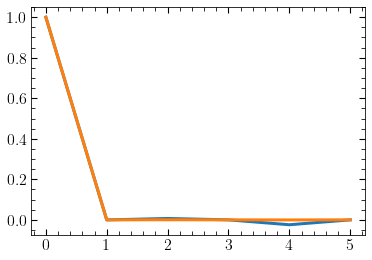

In [76]:
plt.plot(dens_nm/dens_nm[0])
 

#### T = (a**2 - b**2) / (a**2 - c**2)
print(T)